In [36]:
# argument: a list of numbers
#
# outcome: the elements in the list are sorted; no return value
#
def insertion_sort_v1_debug(x, debug_flag):
    
    # invariant:
    #    at the beginning of iteration i, x[0:i] is sorted
    # effect of one iteration:
    #    x[i] is moved to the appropriate position such that x[0: i+1] becomes sorted
    #
    for i in range(len(x)):
        j = 0
        element_i = x[i]
        while x[j] < element_i and j < i:  # all these elements should stay left of x[i]
            j += 1
        if i != j:
            x.pop(i)
            x.insert(j, element_i)
        if(debug_flag):
            print("Breakpoint; invariant: Sublist x[0:", i+1, "] is sorted;\n"\
                  "Sorted part of the list: ", x[:i+1], "\nUnsorted part of the list: ", x[i+1:], sep="")
            input()
        
def insertion_sort_v1(x):
    insertion_sort_v1_debug(x, False)

In [17]:
import random

n = 11
test_list_n = [random.randrange(n*n) for j in range(n)]
print("Test list:", test_list_n, end="\n\n")
insertion_sort_v1_debug(test_list_n, True)
print("Test list:", test_list_n)

Test list: [36, 36, 27, 78, 48, 55, 7, 53, 78, 30, 54]

Breakpoint; invariant: Sublist x[0:1] is sorted;
Sorted part of the list: [36]
Unsorted part of the list: [36, 27, 78, 48, 55, 7, 53, 78, 30, 54]

Breakpoint; invariant: Sublist x[0:2] is sorted;
Sorted part of the list: [36, 36]
Unsorted part of the list: [27, 78, 48, 55, 7, 53, 78, 30, 54]

Breakpoint; invariant: Sublist x[0:3] is sorted;
Sorted part of the list: [27, 36, 36]
Unsorted part of the list: [78, 48, 55, 7, 53, 78, 30, 54]

Breakpoint; invariant: Sublist x[0:4] is sorted;
Sorted part of the list: [27, 36, 36, 78]
Unsorted part of the list: [48, 55, 7, 53, 78, 30, 54]

Breakpoint; invariant: Sublist x[0:5] is sorted;
Sorted part of the list: [27, 36, 36, 48, 78]
Unsorted part of the list: [55, 7, 53, 78, 30, 54]

Breakpoint; invariant: Sublist x[0:6] is sorted;
Sorted part of the list: [27, 36, 36, 48, 55, 78]
Unsorted part of the list: [7, 53, 78, 30, 54]

Breakpoint; invariant: Sublist x[0:7] is sorted;
Sorted part o

In [37]:
# arguments:
#   * a list of numbers x
#   * an index i such that x[0:i] is sorted
#   * a number new_element
#
# return value:
#   * the index j between 0 and i such that all elements of x[0:j] are smaller than new_element,
#     while x[j] is greater or equal to new_element, or if no such x[j] exists, j equals i

def insertion_index_binary_search(x, i, new_element, debug_flag):
    idx_min, idx_max = 0, i
    while idx_max > idx_min:
        idx_mid = (idx_min + idx_max) // 2  # due to integer arithmetics, idx_mid can never be i
        
        if debug_flag:
            print("Evaluating x[", idx_min, ":", idx_max, "] = ", x[idx_min:idx_max], sep="")
            print("Middle index ", idx_mid, " with x[", idx_mid, "] = ", x[idx_mid], sep="")
            input()
        
        if x[idx_mid] < new_element:  # correct index is between idx_mid+1 and idx_max
            idx_min = idx_mid+1
        else:  # correct index is between idx_min and idx_mid
            idx_max = idx_mid

    # after the loop ends, idx_min = idx_max can be returned
    #
    if debug_flag:
        print("Index", idx_min, "specified for insertion")
    return idx_min

In [29]:
import random

n = 50
test_list_n = [random.randrange(n*n) for j in range(n)]
mergesort(test_list_n)
el = random.randrange(n*n)

print("Pre-sorted test list:", test_list_n)
print("New element:", el, end="\n\n")
j = insertion_index_binary_search(test_list_n, n, el, True)


Pre-sorted test list: [6, 156, 244, 288, 366, 411, 420, 441, 559, 603, 618, 781, 799, 801, 894, 960, 962, 1050, 1062, 1064, 1073, 1182, 1259, 1338, 1398, 1434, 1440, 1469, 1511, 1511, 1539, 1560, 1619, 1620, 1625, 1720, 1737, 1815, 1930, 1947, 1962, 1963, 2009, 2138, 2311, 2360, 2365, 2432, 2462, 2491]
New element: 1696

Evaluating x[0:50] = [6, 156, 244, 288, 366, 411, 420, 441, 559, 603, 618, 781, 799, 801, 894, 960, 962, 1050, 1062, 1064, 1073, 1182, 1259, 1338, 1398, 1434, 1440, 1469, 1511, 1511, 1539, 1560, 1619, 1620, 1625, 1720, 1737, 1815, 1930, 1947, 1962, 1963, 2009, 2138, 2311, 2360, 2365, 2432, 2462, 2491]
Middle index 25 with x[25] = 1434

Evaluating x[26:50] = [1440, 1469, 1511, 1511, 1539, 1560, 1619, 1620, 1625, 1720, 1737, 1815, 1930, 1947, 1962, 1963, 2009, 2138, 2311, 2360, 2365, 2432, 2462, 2491]
Middle index 38 with x[38] = 1930

Evaluating x[26:38] = [1440, 1469, 1511, 1511, 1539, 1560, 1619, 1620, 1625, 1720, 1737, 1815]
Middle index 32 with x[32] = 1619

Evaluat

In [38]:
# argument: a list of numbers
#
# outcome: the elements in the list are sorted; no return value
#
def insertion_sort_v2_debug(x, debug_flag):
    
    # invariant:
    #    at the beginning of iteration i, x[0:i] is sorted
    # effect of one iteration:
    #    x[i] is moved to the appropriate position such that x[0: i+1] becomes sorted
    #
    for i in range(len(x)):
        j = 0
        element_i = x[i]
        j = insertion_index_binary_search(x, i, element_i, False)
        if i != j:
            x.pop(i)
            x.insert(j, element_i)
        if(debug_flag):
            print("Breakpoint; invariant: Sublist x[0:", i+1, "] is sorted;\n"\
                  "Sorted part of the list: ", x[:i+1], "\nUnsorted part of the list: ", x[i+1:], sep="")
            input()
        
def insertion_sort_v2(x):
    insertion_sort_v2_debug(x, False)

In [34]:
import random

n = 11
test_list_n = [random.randrange(n*n) for j in range(n)]
print("Test list:", test_list_n, end="\n\n")
insertion_sort_v2_debug(test_list_n, True)
print("Test list:", test_list_n)

Test list: [40, 54, 58, 37, 106, 93, 88, 68, 80, 25, 23]

Breakpoint; invariant: Sublist x[0:1] is sorted;
Sorted part of the list: [40]
Unsorted part of the list: [54, 58, 37, 106, 93, 88, 68, 80, 25, 23]

Breakpoint; invariant: Sublist x[0:2] is sorted;
Sorted part of the list: [40, 54]
Unsorted part of the list: [58, 37, 106, 93, 88, 68, 80, 25, 23]

Breakpoint; invariant: Sublist x[0:3] is sorted;
Sorted part of the list: [40, 54, 58]
Unsorted part of the list: [37, 106, 93, 88, 68, 80, 25, 23]

Breakpoint; invariant: Sublist x[0:4] is sorted;
Sorted part of the list: [37, 40, 54, 58]
Unsorted part of the list: [106, 93, 88, 68, 80, 25, 23]

Breakpoint; invariant: Sublist x[0:5] is sorted;
Sorted part of the list: [37, 40, 54, 58, 106]
Unsorted part of the list: [93, 88, 68, 80, 25, 23]

Breakpoint; invariant: Sublist x[0:6] is sorted;
Sorted part of the list: [37, 40, 54, 58, 93, 106]
Unsorted part of the list: [88, 68, 80, 25, 23]

Breakpoint; invariant: Sublist x[0:7] is sorted;

In [39]:
def selection_sort_debug(x, debug_flag):
    for i in range(len(x)):
        min_idx = i
        for j in range(i+1, len(x)):
            if(x[j] < x[min_idx]):
                min_idx = j
        next_element = x.pop(min_idx)
        x.insert(i, next_element)
        if(debug_flag):
            print("Breakpoint; invariant: List sorted until index i = ", i, ";\n"\
                  "All elements of the unsorted part are greater or equal than those in the sorted part.\n"\
                  "Sorted part of the list: ", x[:i+1], "\nUnsorted part of the list: ", x[i+1:], sep="")
            input()
        
def selection_sort(x):
    selection_sort_debug(x, False)

In [2]:
import random

n = 11
test_list_n = [random.randrange(n*n) for j in range(n)]
print("Test list:", test_list_n, end="\n\n")
selection_sort_debug(test_list_n, True)
print("Test list:", test_list_n)

Test list: [36, 12, 40, 37, 44, 51, 73, 31, 31, 47, 29]

Breakpoint; invariant: List sorted until index i = 0;
All elements of the unsorted part are greater or equal than those in the sorted part.
Sorted part of the list: [12]
Unsorted part of the list: [36, 40, 37, 44, 51, 73, 31, 31, 47, 29]

Breakpoint; invariant: List sorted until index i = 1;
All elements of the unsorted part are greater or equal than those in the sorted part.
Sorted part of the list: [12, 29]
Unsorted part of the list: [36, 40, 37, 44, 51, 73, 31, 31, 47]

Breakpoint; invariant: List sorted until index i = 2;
All elements of the unsorted part are greater or equal than those in the sorted part.
Sorted part of the list: [12, 29, 31]
Unsorted part of the list: [36, 40, 37, 44, 51, 73, 31, 47]

Breakpoint; invariant: List sorted until index i = 3;
All elements of the unsorted part are greater or equal than those in the sorted part.
Sorted part of the list: [12, 29, 31, 31]
Unsorted part of the list: [36, 40, 37, 44, 

In [40]:
def mergesort_debug(x, debug_flag):
    sublist_size = 1  # size of sublists, each of which has been sorted already
    while sublist_size < len(x):
        for offset in range(0, len(x) - sublist_size, 2*sublist_size):
            # we are now merging two sublists, one starting at offset, one starting at offset+sublist_size
            merged_sublist = []
            i = 0  # internal index defined over the first sublist
            j, second_sublist_size = 0, sublist_size  # internal index defined over the second sublist
            if offset + 2*sublist_size > len(x):
                second_sublist_size = len(x) - offset - sublist_size  # index must remain within boundaries
            if debug_flag:
                print("Now merging x[", offset, ":", offset+sublist_size, "] = ", \
                      x[offset: offset+sublist_size], " with x[", offset+sublist_size, ":", \
                      offset+sublist_size+second_sublist_size, "] = ",
                      x[offset+sublist_size: offset+sublist_size+second_sublist_size], sep='')
            
            while i < sublist_size and j < second_sublist_size:
                if(x[offset + i] < x[offset + sublist_size + j]):
                    merged_sublist.append(x[offset + i])
                    i += 1
                else:
                    merged_sublist.append(x[offset + sublist_size + j])
                    j += 1
            # one sublist is now exhausted, we only need to take care of this if it is the first one
            if i < sublist_size:
                for element in x[offset + i: offset + sublist_size]:
                    merged_sublist.append(element)
            
            # now overwrite the two sublists with the merged sublist
            for i in range(len(merged_sublist)):
                x[offset+i] = merged_sublist[i]
            if debug_flag:
                print("Merged to x[", offset, ":", offset+sublist_size+second_sublist_size, "] = ", \
                      x[offset: offset+sublist_size+second_sublist_size], sep = '')
                input()
        sublist_size *= 2
        
def mergesort(x):
    mergesort_debug(x, False)

In [4]:
import random

n = 11
test_list_n = [random.randrange(n*n) for j in range(n)]
print("Test list:", test_list_n, end="\n\n")
mergesort_debug(test_list_n, True)
print("Test list:", test_list_n)

Test list: [100, 75, 112, 1, 60, 113, 7, 26, 59, 59, 38]

Now merging x[0:1] = [100] with x[1:2] = [75]
Merged to x[0:2] = [75, 100]

Now merging x[2:3] = [112] with x[3:4] = [1]
Merged to x[2:4] = [1, 112]

Now merging x[4:5] = [60] with x[5:6] = [113]
Merged to x[4:6] = [60, 113]

Now merging x[6:7] = [7] with x[7:8] = [26]
Merged to x[6:8] = [7, 26]

Now merging x[8:9] = [59] with x[9:10] = [59]
Merged to x[8:10] = [59, 59]

Now merging x[0:2] = [75, 100] with x[2:4] = [1, 112]
Merged to x[0:4] = [1, 75, 100, 112]

Now merging x[4:6] = [60, 113] with x[6:8] = [7, 26]
Merged to x[4:8] = [7, 26, 60, 113]

Now merging x[8:10] = [59, 59] with x[10:11] = [38]
Merged to x[8:11] = [38, 59, 59]

Now merging x[0:4] = [1, 75, 100, 112] with x[4:8] = [7, 26, 60, 113]
Merged to x[0:8] = [1, 7, 26, 60, 75, 100, 112, 113]

Now merging x[0:8] = [1, 7, 26, 60, 75, 100, 112, 113] with x[8:11] = [38, 59, 59]
Merged to x[0:11] = [1, 7, 26, 38, 59, 59, 60, 75, 100, 112, 113]

Test list: [1, 7, 26, 38, 

In [48]:
import time
import random

init = 80
step = 20
nmax = 6000
repetitions = 5

perf_insert_v1 = {}
perf_insert_v2 = {}
perf_select = {}
perf_merge = {}
random.seed()

for n in range(0, nmax+1, step):
    runtime_insert_v1 = 0.0
    runtime_insert_v2 = 0.0
    runtime_select = 0.0
    runtime_merge = 0.0
    for i in range(repetitions):
        test_list_n_1 = [random.randrange(n*n) for j in range(n)]
        test_list_n_2 = [test_list_n_1[j] for j in range(n)]
        test_list_n_3 = [test_list_n_1[j] for j in range(n)]
        test_list_n_4 = [test_list_n_1[j] for j in range(n)]
        
        start = time.time()
        insertion_sort_v1(test_list_n_1)
        runtime_insert_v1 += time.time() - start
        
        start = time.time()
        insertion_sort_v2(test_list_n_2)
        runtime_insert_v2 += time.time() - start
        
        start = time.time()
        selection_sort(test_list_n_3)
        runtime_select += time.time() - start
        
        start = time.time()
        mergesort(test_list_n_4)
        runtime_merge += time.time() - start
        
    perf_insert_v1[n] = runtime_insert_v1 / repetitions
    perf_insert_v2[n] = runtime_insert_v2 / repetitions
    perf_select[n] = runtime_select / repetitions
    perf_merge[n] = runtime_merge / repetitions
    
    print(n, perf_insert_v1[n], perf_insert_v2[n], perf_select[n], perf_merge[n], sep='\t')

0	1.049041748046875e-06	7.152557373046875e-07	7.62939453125e-07	6.67572021484375e-07
20	1.354217529296875e-05	1.4495849609375e-05	1.7404556274414062e-05	4.0578842163085935e-05
40	4.99725341796875e-05	4.1437149047851565e-05	6.709098815917968e-05	0.00011157989501953125
60	0.0001388072967529297	7.28607177734375e-05	0.00016875267028808593	0.00019936561584472657
80	0.0001399517059326172	7.581710815429688e-05	0.00020542144775390626	0.00019750595092773437
100	0.00022473335266113282	0.00010709762573242187	0.0003182411193847656	0.0003237724304199219
120	0.00045285224914550783	0.00021390914916992189	0.0007516384124755859	0.0006191730499267578
140	0.0008403301239013672	0.0002749919891357422	0.0012289524078369141	0.0007000446319580078
160	0.0010503292083740234	0.0002960681915283203	0.0012683868408203125	0.0006961822509765625
180	0.0007679462432861328	0.00023026466369628905	0.0009827136993408204	0.0005098342895507813
200	0.000994253158569336	0.0002529621124267578	0.0012764930725097656	0.00059671401

1840	0.07361068725585937	0.0041316509246826175	0.09171662330627442	0.007568836212158203
1860	0.07659425735473632	0.0041983604431152345	0.09642086029052735	0.007804203033447266
1880	0.08269901275634765	0.004408836364746094	0.1001814365386963	0.007979393005371094
1900	0.07951931953430176	0.004476308822631836	0.10189929008483886	0.008151388168334961
1920	0.08132858276367187	0.00453338623046875	0.10211963653564453	0.007878828048706054
1940	0.08248157501220703	0.005248928070068359	0.0996243953704834	0.007864713668823242
1960	0.08299827575683594	0.0053253173828125	0.10119075775146484	0.007798385620117187
1980	0.08693556785583496	0.004466915130615234	0.10453906059265136	0.007979345321655274
2000	0.08665170669555664	0.004555416107177734	0.10628671646118164	0.00821223258972168
2020	0.09264225959777832	0.0047490596771240234	0.11680364608764648	0.008673334121704101
2040	0.09556217193603515	0.004869413375854492	0.11735334396362304	0.008664989471435547
2060	0.09206748008728027	0.004725217819213867	

3760	0.3410377502441406	0.012844228744506836	0.4141252517700195	0.017530298233032225
3780	0.35329556465148926	0.012686204910278321	0.41347322463989256	0.01857271194458008
3800	0.3371159553527832	0.012207746505737305	0.41079320907592776	0.018537569046020507
3820	0.3492577075958252	0.01374049186706543	0.425189208984375	0.018312549591064452
3840	0.32932209968566895	0.012080097198486328	0.3930262565612793	0.017146825790405273
3860	0.33127169609069823	0.012644529342651367	0.40482387542724607	0.018084049224853516
3880	0.3413355350494385	0.012493753433227539	0.39746460914611814	0.017582178115844727
3900	0.35105881690979	0.012964344024658203	0.434174108505249	0.01816868782043457
3920	0.3589481353759766	0.013613224029541016	0.4343299388885498	0.019379615783691406
3940	0.3430464267730713	0.012559986114501953	0.40693464279174807	0.017627525329589843
3960	0.33388452529907225	0.012324953079223632	0.41754961013793945	0.0178863525390625
3980	0.344816255569458	0.012361764907836914	0.4080005168914795	0

5720	0.7935919761657715	0.023694181442260744	0.9034484386444092	0.028467130661010743
5740	0.7837872505187988	0.024338150024414064	0.923420763015747	0.028338098526000978
5760	0.7927790641784668	0.024699926376342773	0.9846366882324219	0.02935614585876465
5780	0.827521800994873	0.024803686141967773	0.9607218265533447	0.030216503143310546
5800	0.8185110569000245	0.025830888748168947	0.9852794647216797	0.029702281951904295
5820	0.7972644329071045	0.026070070266723634	0.9455700874328613	0.029437255859375
5840	0.807908582687378	0.02435297966003418	0.9204263687133789	0.028950023651123046
5860	0.7853564262390137	0.024635934829711915	0.9306421756744385	0.028980350494384764
5880	0.833219051361084	0.0258638858795166	0.9698606967926026	0.029148006439208986
5900	0.8447036743164062	0.024997234344482422	0.9820626735687256	0.03044285774230957
5920	0.8325673103332519	0.024353551864624023	0.9627044200897217	0.032026481628417966
5940	0.8265833854675293	0.02811717987060547	0.9835022449493408	0.031625175476

<AxesSubplot:xlabel='input list size', ylabel='average runtime in seconds'>

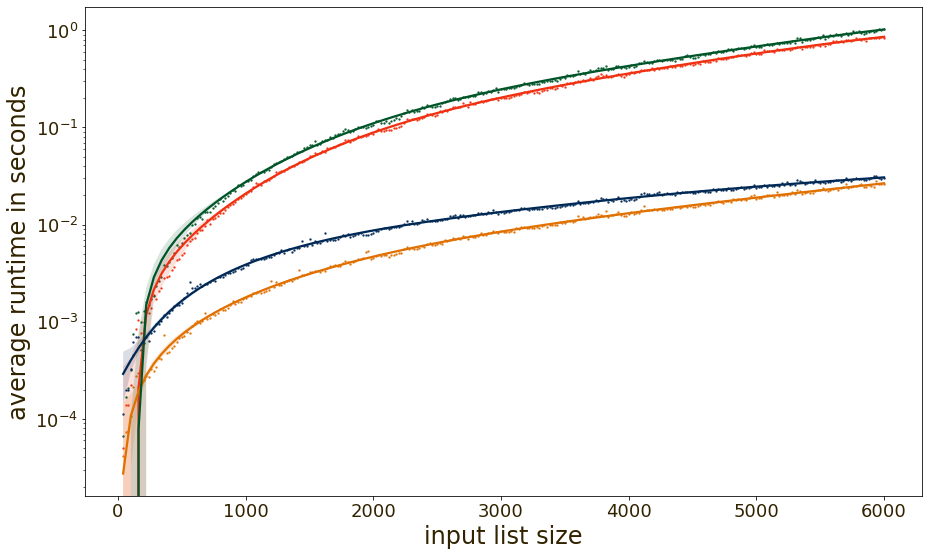

In [54]:
import seaborn as sbn
import matplotlib.pyplot as plt

keylist_insert_v1 = list(perf_insert_v1.keys())[2:]
vallist_insert_v1 = list(perf_insert_v1.values())[2:]

keylist_insert_v2 = list(perf_insert_v2.keys())[2:]
vallist_insert_v2 = list(perf_insert_v2.values())[2:]

keylist_select = list(perf_select.keys())[2:]
vallist_select = list(perf_select.values())[2:]

keylist_merge = list(perf_merge.keys())[2:]
vallist_merge = list(perf_merge.values())[2:]

fig, ax = plt.subplots()
fig.set_size_inches(15, 9)
plt.xticks(fontsize=18, color="#322300")
plt.yticks(fontsize=18, color="#322300")
ax.set_xlabel("input list size", fontsize=24, color="#322300")
ax.set_ylabel("average runtime in seconds", fontsize=24, color="#322300")
ax.set_yscale('log')

sbn.regplot(x=keylist_insert_v1, y=vallist_insert_v1, color='#f03010', order=6, scatter_kws={'s':2})  # red for insertion sort v1
sbn.regplot(x=keylist_insert_v2, y=vallist_insert_v2, color='#e07000', order=6, scatter_kws={'s':2})  # orange for insertion sort v2
sbn.regplot(x=keylist_select, y=vallist_select, color='#005528', order=6, scatter_kws={'s':2})  # green for selection sort
sbn.regplot(x=keylist_merge, y=vallist_merge, color='#002855', order=6, scatter_kws={'s':2})  # blue for mergesort